In [19]:
import sys
import os
sys.path.insert(0, os.getcwd()+"/Utils")
import PolyTurk as pt
TRIAL_ID = 6
MASK_PATH = '/home/andrew/ImageSegmentation/Training/Trial'+str(TRIAL_ID)+'/masks/'
IMG_PATH = '/home/andrew/ImageSegmentation/Training/Raw_Images_1024/'

trial_inputs = {
    'TRIAL_ID': TRIAL_ID,
    'MASK_PATH': MASK_PATH,
    'IMG_PATH': IMG_PATH
}

## Initialize Turk object

In [44]:
turk = pt.Turk(trial_inputs)

Number of HITs: 109
Reviewable Assignments: 24


In [45]:
trial_data = turk.getTaskData()

In [41]:
turk.Overwrite=True
turk.getTaskData()

[{'Mask_Name': 'SemImage111_8YTZO.png',
  'Image_ID': '111',
  'AssignmentID': '3ZGVPD4G6THK21CB6N10FGB888YTZO',
  'Worker': 'A234WZ4KX8IW07',
  'Answer': [{'label': 'Microvilli',
    'vertices': [{'x': 173, 'y': 74},
     {'x': 123, 'y': 80},
     {'x': 115, 'y': 92},
     {'x': 111, 'y': 109},
     {'x': 106, 'y': 121},
     {'x': 98, 'y': 134},
     {'x': 93, 'y': 148},
     {'x': 83, 'y': 166},
     {'x': 74, 'y': 191},
     {'x': 68, 'y': 224},
     {'x': 67, 'y': 243},
     {'x': 61, 'y': 263},
     {'x': 58, 'y': 282},
     {'x': 57, 'y': 304},
     {'x': 54, 'y': 319},
     {'x': 50, 'y': 343},
     {'x': 44, 'y': 368},
     {'x': 40, 'y': 387},
     {'x': 40, 'y': 409},
     {'x': 38, 'y': 424},
     {'x': 39, 'y': 442},
     {'x': 45, 'y': 457},
     {'x': 46, 'y': 472},
     {'x': 44, 'y': 489},
     {'x': 44, 'y': 509},
     {'x': 43, 'y': 522},
     {'x': 49, 'y': 543},
     {'x': 49, 'y': 555},
     {'x': 43, 'y': 567},
     {'x': 43, 'y': 591},
     {'x': 45, 'y': 616},


## Preview Results

In [46]:
import pandas as pd
from IPython.display import HTML
from PIL import Image
from io import BytesIO
import base64

pd.set_option('display.max_colwidth', -1)

def get_thumbnail(paths):
    bg = Image.open(paths[0])
    rgbimg = Image.new("RGBA", bg.size)
    rgbimg.paste(bg)
    fg = Image.open(paths[1])
    rgbimg.paste(fg, (0, 0), fg)
    rgbimg.thumbnail((150, 150), Image.LANCZOS)
    return rgbimg

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'png')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

df = pd.DataFrame(trial_data)
df = df.drop(columns=['Answer'], axis=1)


#qgrid_widget = qgrid.show_grid(df.groupby('Worker'), show_toolbar=True)
#qgrid_widget
dfworker = df.groupby(['Worker','AssignmentID'])
dfworker.first()

import qgrid
qgrid_widget=qgrid.show_grid(dfworker.first(),show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

,Worker,Preview,Score,Approved
0,A140SSBQN3MMBA,,10,False
1,A3V6XE43H0BFC9,,10,False
2,A234WZ4KX8IW07,,10,False
3,A3V6XE43H0BFC9,,10,False
4,A234WZ4KX8IW07,,10,False
5,A140SSBQN3MMBA,,10,False
6,A1XGHGHD0LCPXJ,,10,False
7,A2F9FURICZCOY3,,10,False
8,A234WZ4KX8IW07,,10,False
9,A140SSBQN3MMBA,,10,False

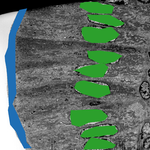
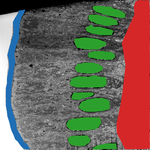
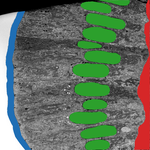
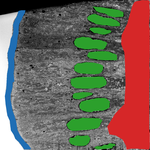
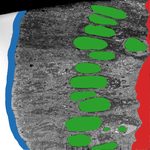
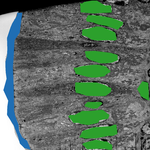
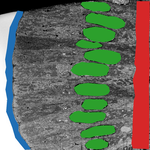
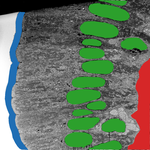
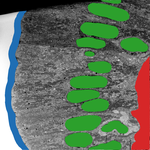
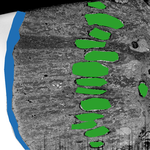
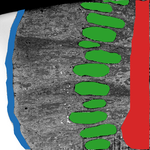
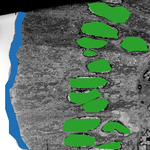
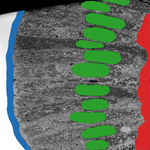
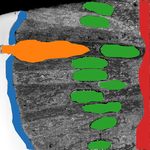
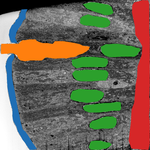
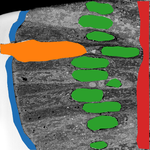
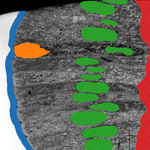
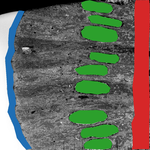
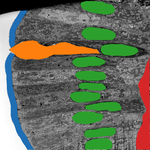
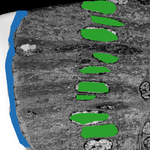
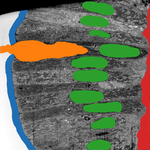
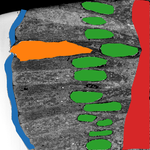
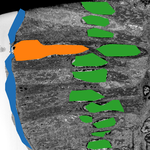
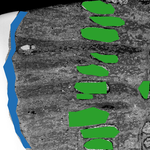

In [47]:
import pandas as pd
df = pd.DataFrame(trial_data)
df['URLs'] = df[['Image_Path', 'Mask_Path']].values.tolist()
df['Preview'] = df.URLs.map(lambda f: get_thumbnail(f))
#df.sort_values(by=['Worker'])
#df.pivot(index='Worker', columns='Image_ID', values='Avg_Poly_Verts')
HTML(df[['Worker', 'Preview','Score','Approved']].to_html(formatters={'Preview': image_formatter}, escape=False))
#df

In [ ]:
df